** 참고 : 파이썬 완벽가이드, TEAM EDA 김현우님 블로그 **
# 개요
- 아마존 등과 같은 전자상거래 업체부터 넷플렉스, 유투브, 애플 뮤직 등 콘텐츠 포털까지 추천 시스템을 통해 사용자의 취향을 이해하고 맞춤 상품과 콘텐츠를 제공해 조금이라도 오랫동안 자기 사이트에 고객을 머무르게 하기 위해 전력을 기울임.

- **사용자(user)**에게 **상품(item)**을 제안하는 기술. 어떤 상품을 구매할지, 어떤 음악을 들을지 또는 어떠 온라인 뉴스를 읽은지와 같은 다양한 의사결정과 연관이 있음.

## 기업에서의 추천시스템
 - 당근마켓(https://medium.com/daangn/tagged/%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C)
 - 네이버(https://deview.kr/2017/schedule/180)
 - 카카오(https://tech.kakao.com/2020/06/23/recruit-algorithm-ml/)


<img src = 'https://drive.google.com/uc?export=view&id=1R08RWz2xL8UFK7rmEmRMj38kOYndmCGQ'>

- 당근 마켓은 user based 기반의 추천이라고 함.

<img src = 'https://drive.google.com/uc?export=view&id=1K2CAk8oxyrK2grnBmdFMlJ5vUmrxBvAn'>

- 카카오에서 운영중인 브런치에서는 읽은 글과 비슷한 내용의 글을 추천해줌. 이러한 방식을 item based 기반의 추천.

- 보통 이전의 기업에서는 파레토의 법칙을 이용한 전략을 세움. 해당 법칙은 이탈리아의 경제 학자가 찾아낸 법칙으로 완도콩의 80%는 20%의 콩깍지에서 열리는 사실. 기업에서는 상위 20%가 전체 매출의 80%의 가치를 창출하니 해당 고객에 역량을 집중해야한다는 의미.

<img src = 'https://drive.google.com/uc?export=view&id=1EXC-FO6l0uV7feU3ZwJAjI44usHYuHlb'>


- 하지만, 인터넷 발전에 힘입어 넷플릭스와 아마존과 같은 회사들은 파레토의 법칙이 아닌 롱테일의 법칙에 집중을 하기 시작을 하였음.

- 파레토의 법칙과는 반대로 롱테일의 법칙은 하위 80%가 상위 20%의 가치보다 크다는 법칙.


<img src = 'https://drive.google.com/uc?export=view&id=1LAPaifuTZTqAh7N4oBx_FrAK6Kx8iYnO'>

<img src = 'https://drive.google.com/uc?export=view&id=1sVySv273Z34rDEVLkpC20uJJjIH9n9eU'>

참고자료 : HoonDongKim, 추천시스템 - 알고리즘 Trend 정리

- 추천시스템의 알고리즘을 본격적으로 살펴보기 전에 과거에는 어떤 방식으로 추천했는지, 현재에는 어떤 방식으로 추천하는지에 대해 살펴보도록 하겠습니다. 
- 초창기의 추천시스템은 연관분석과 관련된 알고리즘을 많이 사용했습니다. 말 그대로 해당 상품과 연관있는 상품을 찾는 방법인데 자세한 내용은 조금 있다가 설명하겠습니다. 이후, 넷플릭스에서 영화추천 관련 대회를 3년 동안 열었는데 해당 대회에서 SVD를 이용한 Matrix Factorization 기법이 우승을 차지했고 현재까지도 협업 필터링 방법의 알고리즘을 많이 사용하고 있습니다. 이후에는 딥러닝의 발달에 힘입어 딥러닝 모델, 강화학습 모델, 그래프 모델 등 여러 가지 형태의 최신 모델들이 사용되고 있습니다.

- 그중에서도 이번 포스팅에서는 대표적으로 과거에 많이 사용했던 알고리즘인 연관분석, Apriori, FP-Growth를 통해서 추천시스템의 알고리즘이 어떤 식으로 작동하는지 알아보도록 하겠습니다.

## 연관 분석

- 룰 기반의 모델로서 상품과 상품사이에 어떤 **연관**이 있는지 찾아내는 알고리즘.

### 연관의 정의
1. 얼마나(Frequent) 같이 구매가 되는가?
2. A 아이템을 구매하는 사람이 B아이템을 구매하는가?

- 어떤 상품들이 한 장바구니 안에 담기는 지 살피는 모습과 비슷하기 때매 장바구니 분석이라고 표현하기도 합니다.


-   해당 이미지는 월마트에서 맥주를 구매할 때 기저귀를 같이 구매하는 경향이 크다는 것을 밝혀서 둘을 함께 진열하는 전략으로 매출을 향상했다는 내용입니다 .특정 상품(맥주)과 특정 상품(기저귀)간의 연관성을 파악해서 같이 구매하도록 유도(함께 진열)하는 것이 추천시스템의 기본적인 전략이라고 할 수 있습니다. 
<img src = 'https://drive.google.com/uc?export=view&id=1acWyQm_64-xXn8_UPg0PRuaOMkgKFMxs'> 


-  먼저, 연관분석을 사용하기에 앞서서 연관분석에 사용하는 평가지표를 살펴보겠습니다. 연관분석에 사용되는 지표는 3가지가 있습니다. 각각의 지표의 의미와 수식을 함께 살펴보면, 아래와 같이 3개의 지표가 있고 연관분석의 효용을 평가하기 위해 3가지 지표를 함께 비교합니다.

- 지지도 : 특정 상품 A를 구매할 확률
- 신뢰도 : 특정 상품 A를 구매했을 경우에, B도 구매할 확률
- 향상도 : 특정 상품 A와 B를 동시에 구매할 확률 (두 사건이 동시에 얼마나 발생하는지 비율)


<img src = 'https://drive.google.com/uc?export=view&id=1FEtKGjLEodXNWfU0bDt2_ADY4rkTkGAU'>

- 신뢰도랑 향상도는 의미가 비슷한데 무슨 차이가 있을까요? 신뢰도 같은 때는 A 상품이 구매되었을 때 B 상품이 구매할 확률입니다. 즉, 특정 조건(A 상품 구매)을 줬을 때 결과(B 상품 구매)가 발생하는 조건부확률로 생각할 수 있습니다. 하지만 향상도 같은 때는 A를 구매했을 때 B의 구매 정도를 보는 것이 아니라 B를 구매 시에 A도 구매를 어느 정도 하는지? A를 구매 시에 B도 어느 정도 구매하는지? 를 동시에 측정합니다. 즉, A와 B를 각각 구매한다고 했을 때, A와 B 상품의 구매가 얼마나 같이 일어나는 정도를 측정하는 것으로 해석할 수 있고 만일 A 상품과 B 상품이 독립인 때는 P(A, B) = P(A) ∙ P(B)가 되어서 향상도는 1이 됩니다. 만일, 1보다 크다면 어느 정도 향상도를 하고 있다고 해석할 수 있습니다.


- 먼저, 상품 간의 연관성을 파악하기 위해 어떤 규칙이 있는지 만들어보도록 하겠습니다. 상품이 4개 있을 때의 규칙은 상품을 구매하지 않는 경우를 제외하면, 총 15가지가 있습니다. 고등학교 수학에서 순열과 조합을 통해서 상품이 4개일 때 2개를 선택하는 경우의 수는 4C2로 6이 되는 것을 배웠습니다. 이제, 이를 이용해서 모든 경우의 수를 계산하면 1개만 선택한 경우의 수 + 2개만 선택한 경우의 수 + 3개만 선택한 경우의 수 + 4개만 선택한 경우의 수 = 15개의 경우의 수가 있음을 알 수 있습니다. (전체 경우의 수 16 - 0개만 선택하는 경우의 수를 통해서 15를 계산할 수도 있습니다.(0개만 선택하는 경우의 수 = 1))

<img src = 'https://drive.google.com/uc?export=view&id=1Ly_-rJRsPitP60JiCTMNLF7eJ5C8vClK'>


- 하지만 이처럼 모든 규칙의 경우의 수를 계산하고 3가지 지표를 비교해가면서 좋은 규칙을 찾기에는 문제점이 있습니다. 어떤 문제점이 있을까요? 바로 시간과 메모리가 너무 많이 차지한다는 점입니다. 

- 아래의 그래프는 아이템의 수가 증가함에 따라서 규칙의 수가 얼마나 증가하는지에 대한 그래프입니다. 10개의 아이템까지만 해도 크지 않았던 규칙의 수가 15를 기점으로 기하급수적으로 상승하는 것을 볼 수 있습니다. 당연하게도, 아이템의 수는 2의 n 제곱에서 1을 뺀 값으로 아이템이 하나 늘어날 때마다 지수분포 형태로 증가해서 50개의 상품만 되어도 약 10^15으로 1경에 조금 못 미치는 것을 볼 수 있습니다.

<img src = 'https://drive.google.com/uc?export=view&id=1n7XDOygU_9pO7wtasT_aGHtzCcv7WBTc'>

## Apriori 알고리즘

- A priori 원리는 아이템 셋의 증가를 줄이는 방법입니다. 기본적인 아이디어는 “빈번한 아이템 셋은 하위 아이템 셋 또한 빈번할 것이다＂입니다. 즉, “빈번하지 않은 아이템 셋은 하위 아이템 셋 또한 빈번하지 않다＂를 이용해서 아이템 셋의 증가를 줄이는 방법입니다.

- 아래의 예시를 보면 아이템2와 3을 같이 구매하는 경우가 빈번하지 않습니다. 그렇다면, 2와 3에다가 0번이나 1을 같이 구매하는 때도 빈번할까요? 그렇지 않을 것입니다. 2개의 상품을 동시에 구매하는 확률보다는 3개를 구매하는 확률이 더 낮기 때문이죠. 이를 이용해서 2와 3이 빈번하지 않으면 2와 3을 포함한 모든 경우의 수 (0, 2, 3), (1, 2, 3), (0, 1, 2, 3)까지 모두 제거하는 것이 Apriori 알고리즘입니다.

<img src = 'https://drive.google.com/uc?export=view&id=19JbM6DWR-39V33gcozKz6hCmU1AAZe50'>

- Apriori 알고리즘

1. k개의 item을 가지고 단일항목집단 생성 (one-item frequent set)
2. 단일항목집단에서 최소 지지도(support) 이상의 항목만 선택
3. 2에서 선택된 항목만을 대상으로 2개항목집단 생성
4. 2개항목집단에서 최소 지지도 혹은 신뢰도 이상의 항목만 선택
5. x 위의 과정을 k개의 k-item frequent set을 생성할 때까지 반복

우유, 기저귀, 쥬스, 양상추, 맥주 5개의 상품을 가진 경우에 대해 한번 Apriori 알고리즘을 적용해보도록 하겠습니다. 상품의 개수는 총 5개이고 거래는 4번만 발생했다고 생각하겠습니다. 그러면 아래와 같이 거래 테이블을 생성할 수 있습니다.

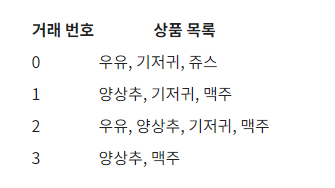


이러한 거래테이블을 행렬으로 표현하면 아래와 같은데, 행렬의 대부분의 값이 0을 가지기에 희소행렬(sparse matrix)이라고 표현합니다.

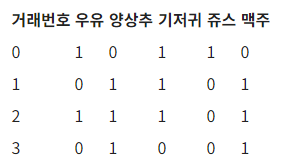

알고리즘에서 이제 k개의 item을 가지고 단일항목집단 생성 (one-item frequent set) 하는 과정부터 진행하도록 하겠습니다. 5개의 상품목록이 있으니 단일항목집단을 만들면 아래와 같이 5개에 대해서 생성됩니다.

- 단일항목집단 생성 (one-item frequent set) : 우유, 양상추, 기저귀, 맥주, 쥬스
이제, 위의 단일항목집단에서 최소 지지도(support) 이상의 항목만 선택 (예: 최소지지도 0.5) 해야 합니다. 

- 이 부분이 Apriori 알고리즘의 핵심으로 지지도가 특정 임계값 이하이면 해당 규칙은 별로라고 판단하고 버리는 것입니다. 지지도는 아래와 같이 표현할 수 있는데, 예를 들어 우유의 경우는 4번의 거래 중에서 2번만 발생했기에 2/4 = 0.5의 지지도를 가지는 것입니다. 쥬스의 경우는 4번 중에 1번만 발생해서 1/4 = 0.25의 지지도를 가지고 이 값이 기존에 설정해준 최소 지지도 0.5보다 작기에 쥬스는 버리고 알고리즘이 진행되게 됩니다.

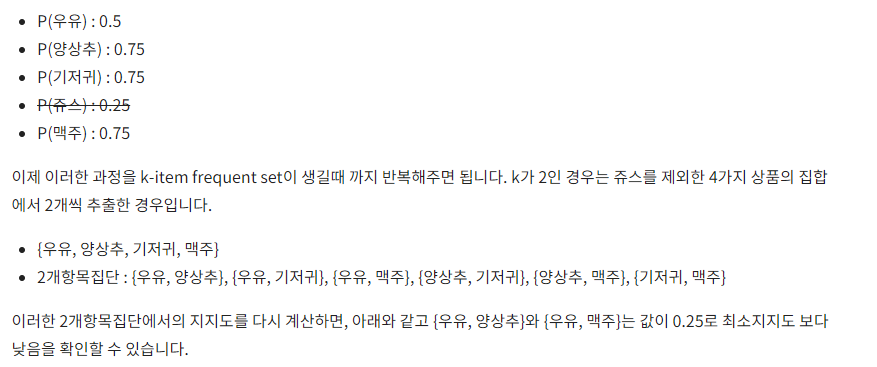

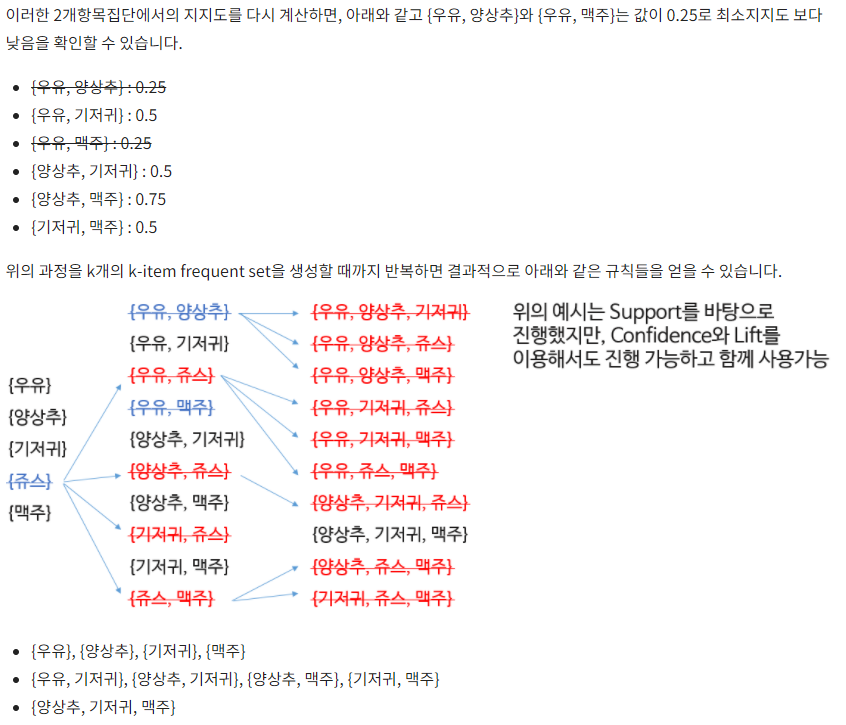

지지도만을 기준으로 판단했을 때, {우유, 기저귀}, {양상추, 기저귀}, {양상추, 맥주}, {기저귀, 맥주}, {양상추, 기저귀, 맥주}의 상품집단들이 같이 구매될 확률이 높으니 같이 전시를 하든 행사를 하든 어떤 마케팅 전략이 필요하다는 것입니다. 하지만, 꼭 지지도만으로 이를 계산해야하는 것은 아닙니다. Confidence와 Lift를 통해서 위의 과정을 진행해도 괜찮고 여러가지 지표를 통해서 비교한 다음에 결과를 판단하는 것이 가장 정확합니다.

이러한 Apriori 알고리즘의 장점과 단점은 아래와 같습니다.



### 장점

- 원리가 간단하여 사용자가 쉽게 이해할 수 있고 의미를 파악할 수 있음
- 유의한 연관성을 갖는 구매패턴을 찾아줌

### 단점

- 데이터가 클 경우 (item이 많은 경우)에 속도가 느리고 연산량이 많음
- 실제 사용시에 많은 연관상품들이 나타나는 단점이 있음


비록 Apriori 알고리즘이 연관분석의 속도와 연산량을 해결하기 위한 알고리즘이지만 충분한 해결책은 되지 못했습니다. 이를 해결하기 위한 방법이 다음에 나오는 FP-Growth라는 방법입니다.

## FP-Growth
- A Priori의 속도 측면의 단점을 개선한 알고리즘.
- A Priori와 비슷한 성능을 내지만,  FP Tree라는 구조를 사용해서 따른 속도를 가진다는게 장점. 하지만 동일하게 발생하는 아이템 셋(frequent itemsets)을 찾는 데는 좋지만 아이템 간의 연관성을 찾는 것은 어렵다는 단점이 있습니다. 아이템 간의 연관성이란 A 아이템을 구매했을 때, B 아이템을 구매하는 식의 연관성입니다. 양상추, 기저귀를 구매한 소비자가 맥주를 구매하는 것과 같은 식입니다. 위의 Apriori 예시에서 Confidence라는 방식을 사용했을 때와 {양상추, 기저귀} -> {맥주}와 같은 결과를 얻기는 힘든 것이 FP-Growth의 한계입니다.


###FP-Growth 알고리즘
1. 모든 거래를 확인하여, 각 아이템마다의 지지도(support)를 계산하고 최소 지지도이상의 아이템만 선택
2. 모든 거래에서 빈도가 높은 아이템 순서대로 순서를 정렬
3. 부모 노드를 중심으로 거래를 자식노드로 추가해주면서 tree를 생성
4. 새로운 아이템이 나올 경우에는 부모노드부터 시작하고, 그렇지 않으면 기존의 노드에서 확장
5. 위의 과정을 모든 거래에 대해 반복하여 FP TREE를 만들고 최소 지지도 이상의 패턴만을 추출

먼저, 1의 과정에서 쥬스가 삭제되는 것은 Apriori와 동일합니다.


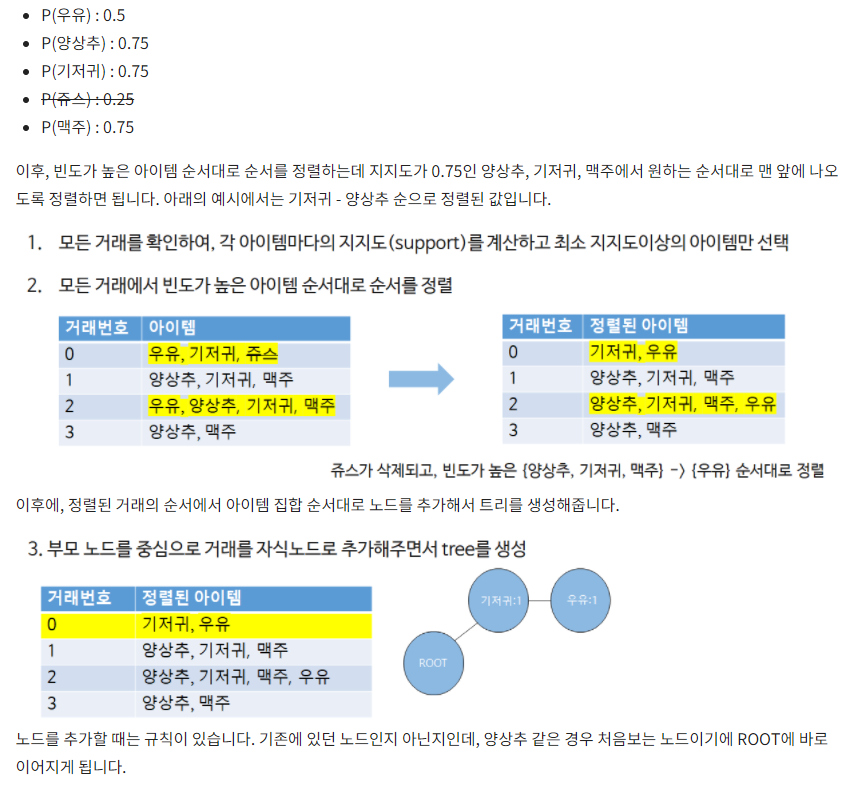

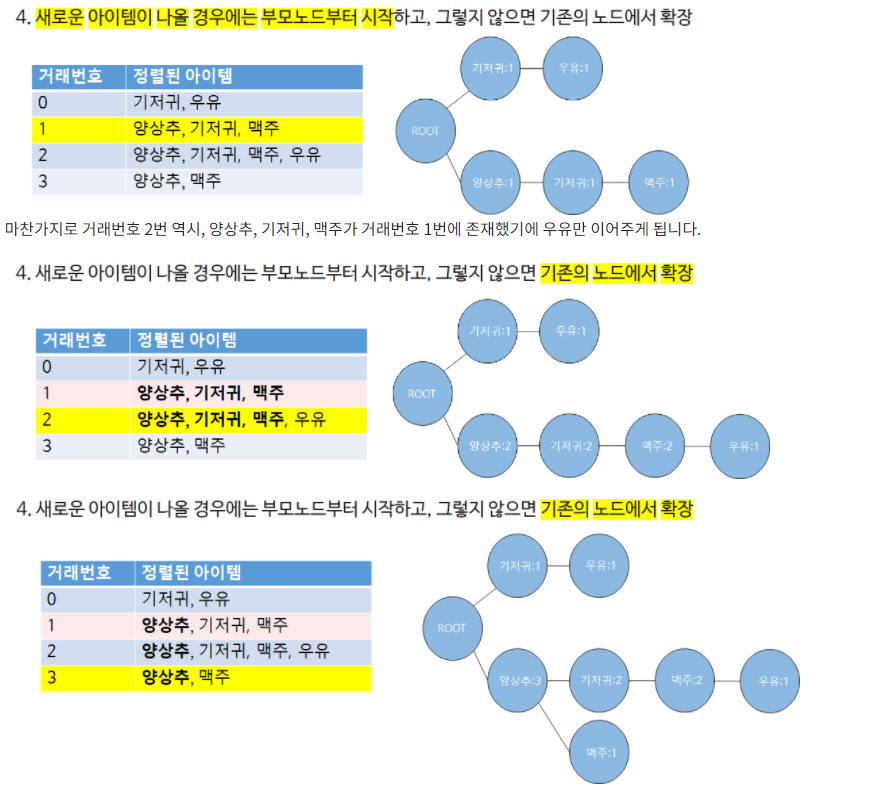

이런식으로 모든 거래에 대해서 진행되면 위와 같이 FP-Growth 트리가 생성됩니다. 이렇게 만들어지면 FP-Growth 트리를 분해해서, 연관성이 큰 아이템 목록들을 추출할 수 있습니다. 분해과정을 먼저 천천히 살펴보면, 지지도가 낮은 순서부터 어떤 조건의 패턴을 가지는지 생성합니다. 아래는 우유의 조건부 패턴을 생성한 것인데, 우유를 구매했을 경우에 가질 수 있는 조건부 패턴은 {기저귀 | 우유}, {양상추, 기저귀, 맥주| 우유} 가 있습니다.


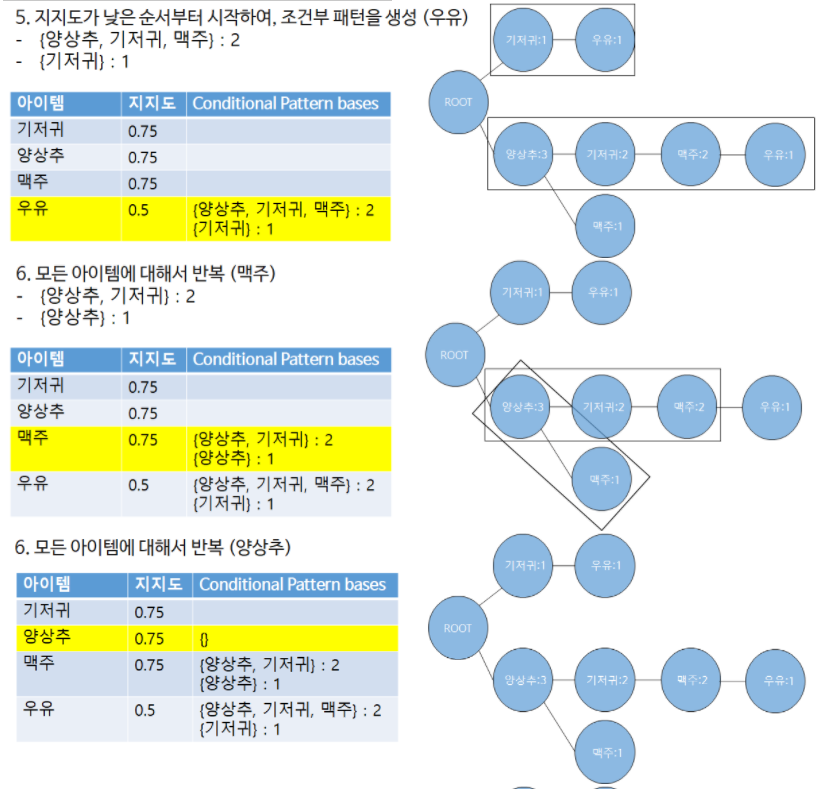



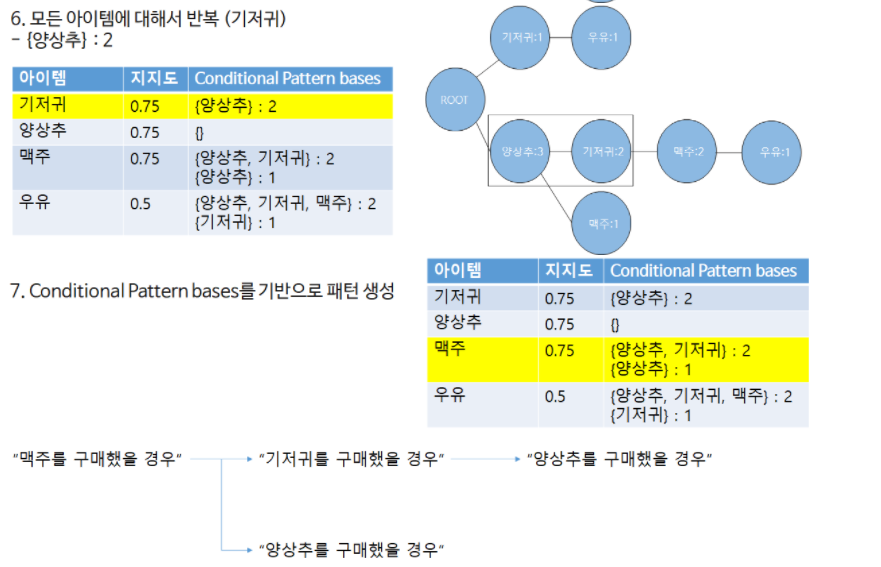

위의 과정을 모두 거치면, {기저귀, 양상추 | 맥주}, {양상추 | 맥주}를 얻을 수 있고 {양상추 | 맥주}의 경우는 값이 1로 작아서 제거하고 {기저귀, 양상추 | 맥주}만 사용할 수도 있습니다. 이렇게 진행한 FP-Growth 방식의 장점과 단점을 생각하면 아래와 같습니다.

### 장점

- Apriori 알고리즘보다 빠르고 2번의 탐색만 필요로 함
- 후보 Itemsets 을 생성할 필요없이 진행 가능
### 단점

- 대용량의 데이터셋에서 메모리를 효율적으로 사용하지 않음
- Apriori 알고리즘에 비해서 설계하기 어려움
- 지지도의 계산이 FP-Tree가 만들어지고 나서야 가능함


위와 같은 문제점들을 안고 있습니다. 한번 Apriori와 FP-Growth의 코드에 대해 살펴보도록 하겠습니다. numpy로 해당 코드를 작성하는것은 어렵기에 패키지를 mlxtend 를 이용하도록 하겠습니다.

Mlxtend(machine learning extensions)은 일상적인 데이터 사이언스 작업에 유용한

도구들로 구성된 파이썬 라이브러리입니다.  

mlxtend 깃허브 | https://github.com/rasbt/mlxtend

In [1]:
!pip install mlxtend 

In [2]:
import mlxtend
print(mlxtend.__version__)

0.19.0dev


In [3]:
import mlxtend
import numpy as np
import pandas as pd

data = np.array([
    ['우유', '기저귀', '쥬스'],
    ['양상추', '기저귀', '맥주'],
    ['우유', '양상추', '기저귀', '맥주'],
    ['양상추', '맥주']
])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


In [4]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,True,True,True,False
3,False,True,True,False,False


In [5]:
%%time
# 9.97ms 
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.5, use_colnames=True)

CPU times: user 7.18 ms, sys: 1.08 ms, total: 8.26 ms
Wall time: 7.67 ms


In [6]:
%%time
# 1.99ms 
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(df, min_support=0.5, use_colnames=True)

CPU times: user 2.47 ms, sys: 158 µs, total: 2.63 ms
Wall time: 2.37 ms


## 유사도를 이용한 추천 시스템 구현하기


캐글에서 사용되었던 영화 데이터셋을 가지고 영화 추천 시스템을 만들어보겠습니다. TF-IDF와 코사인 유사도만으로 영화의 줄거리에 기반해서 영화를 추천하는 추천 시스템을 만들 수 있습니다.

다운로드 링크 : https://www.kaggle.com/rounakbanik/the-movies-dataset


추천 시스템을 구축하기 위해 두 개의 MovieLens 데이터 세트를 사용합니다.

- The Full Dataset: 270,000명의 사용자가 45,000개의 영화에 남긴 26,000,000개의 평가와 750,000개의 태그로 구성되어 있습니다. 1,100개의 태그에서 1200만 개의 관련성 점수를 가진 태그 게놈 데이터를 포함합니다.
- The Small Dataset: 700명의 사용자가 9,000개의 영화에 적용한 100,000개의 등급과 1,300개의 태그로 구성됩니다.

import 라이브러리
것
- seaborn: Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다. 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존

- CountVectorizer: 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만듦
TfidfVectorizer: CountVectorizer와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 벡터를 만듦

- literal_eval: Python literal을 담고 있는 String 형태의 expression을 Python literal 형태로 사용할 수 있게 해준다(ex. String to Dictionary)

- NLTK(Natural Language Toolkit) : 패키지는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지다. 다양한 기능 및 예제를 가지고 있으며 실무 및 연구에서도 많이 사용된다. SnowballStemmer: 어근 추출
WordNetLemmatizer: 표제어 추출

- surprise: 추천 시스템 알고리즘 제공 패키지

In [ ]:
!pip install surprise

     |████████████████████████████████| 11.8MB 259kB/s 


In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD, accuracy

import warnings; warnings.simplefilter('ignore')

## 단순 추천 시스템(Simple Recommender)
단순 추천 시스템은(Simple Recommender)는 영화의 인기와 (때로는) 장르에 따라 모든 사용자에게 일반화된 추천을 제공합니다. 이 추천 시스템의 기본 아이디어는 더 대중적이고 비평적인 영화는 일반 대중이 좋아할 가능성이 더 높다는 것입니다. 이 모델은 사용자를 기반으로 한 개인화된 추천은 제공하지 않습니다.

이 모델의 구현은 매우 간단합니다. 평점과 인기도에 따라 영화를 정렬하고 목록의 최상위 영화를 표시하기만 하면 됩니다. 추가적으로 장르를 변수로 전달하여 특정 장르의 최고 영화를 얻을 수 있습니다.

In [ ]:
md = pd.read_csv('/content/drive/MyDrive/The Movie Dataset/movies_metadata.csv')
md

In [ ]:
print('////////////////////// Before ////////////////////// \n', md['genres'].head(), '\n////////////////////// Before //////////////////////')

# dictionary안에 담겨있는 Genre 정보를 List 형태로 세팅
# 1. md['genres'].fillna('[]') : genres 컬럼에 null 값을 '[](빈 리스트 값)'으로 채워넣음
# 2. apply(literal_eval) : literal_eval를 사용하여 String으로 되어있는 값을 List & Dictionary로 사용할 수 있게 변환
# 3. apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else []) : x가 list인 경우 안에 들어있는 dictionary 중 name에 해당하는 값을 list에 담음
md['genres'] = md['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

print('////////////////////// After ////////////////////// \n', md['genres'].head(), '\n////////////////////// After //////////////////////')

Top Movies Chart를 만들기위해 TMDB Ratings를 사용합니다. IMDB의 weighted rating 공식을 사용하여 차트를 구성합니다. 수학적으로는 다음과 같이 표현됩니다.

// TO-DO : 왜 수학적으로 이렇게 계산하는지?
Weighted Rating (WR) =  ${\dfrac{v}{v+m}*R} + {\dfrac{v}{v+m}*C}$

 - v : 영화에 대한 평가 수
 - m : 차트에 표시되어야 하는 최소 평가 수
 - R : 영화의 평점
 - C : 전체 영화에 대한 평균 점수


다음 단계는 차트에 표시되어야 하는 최소 투표 수 인 m에 적절한 값을 결정하는 것입니다. 95 번째 백분위 수를 컷오프로 사용합니다. 다시 말해서, 차트에 영화가 실리려면 영화가 목록에 있는 영화의 최소 95%보다 더 많은 표를 가져야합니다.

이제 전체 상위 250 차트를 작성하고, 특정 장르에 대한 차트를 작성하는 기능을 정의할 것입니다.

In [ ]:
print('vote ::: \n', md[['vote_count', 'vote_average']].head())
vote_counts = md[md['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = md[md['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
C

In [ ]:
# 총 45460개의 영화 중 상위 5%는 2273번째
print(vote_counts.sort_values(ascending=False)[2273:2274])

# quantile는 데이터를 크기대로 정렬하였을 때 분위수를 구하는 함수. quantile(0.95)는 상위 5%에 해당하는 값을 찾는 것
m = vote_counts.quantile(0.95)
m

In [ ]:
print('release_date ::: \n', md['release_date'].head())

# pd.to_datetime
# errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
# If ‘raise’, then invalid parsing will raise an exception
# If ‘coerce’, then invalid parsing will be set as NaT
# If ‘ignore’, then invalid parsing will return the input

# 'release_date'를 split해서 year만 추출
md['year'] = pd.to_datetime(md['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

print('year ::: \n', md['year'].head())

In [ ]:
# 평가 수가 상위 5%인(434보다 큰) 데이터 추출
qualified = md[(md['vote_count'] >= m) & (md['vote_count'].notnull()) & (md['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

차트에 오를 수 있는 자격을 갖추려면 영화가 TMDB에서 최소 434 개 이상의 평가를 받아야합니다. 또한 TMDB에서 영화의 평균 평점은 10점 만점에 5.244입니다. 2274편의 영화가 우리 차트에 올랐습니다.

In [ ]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [ ]:
# Weighted Rating 상위 250개의 영화 
qualified = qualified.sort_values('wr', ascending=False).head(250)

Top Movies

In [ ]:
qualified.head(15)

크리스토퍼 놀란의 영화, 인셉션, 다크 나이트 및 인터스텔라가 차트의 맨 위에 나타납니다. 이 차트는 특정 장르 및 감독에 대한 TMDB 사용자의 강한 편향(bias)을 나타냅니다.

이제 특정 장르에 대해 차트를 작성하는 함수를 정의하겠습니다. 이를 위해, 기본 조건을 95 대신 85번째 백분위 수로 완화합니다.

In [ ]:
# stack() : stack이 (위에서 아래로 길게, 높게) 쌓는 것이면, unstack은 쌓은 것을 옆으로 늘어놓는것(왼쪽에서 오른쪽으로 넓게) 라고 연상이 될 것
# reset_index() : 기존의 행 인덱스를 제거하고 인덱스를 데이터 열로 추가
s = md.apply(lambda x: pd.Series(x['genres']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
print(s.head(10))

gen_md = md.drop('genres', axis=1).join(s)
print(gen_md.head(10))

In [ ]:
def build_chart(genre, percentile=0.85):
    df = gen_md[gen_md['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title','year','vote_count','vote_average','popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified

Top 15 Romance Movies를 표시하여 실제 작동 방식을 살펴 보겠습니다(로맨스는 가장 인기있는 영화 장르 중 하나 임에도 불구하고 Generic Top Chart에 거의 등장하지 않았습니다).

# Top Reomance Movies

In [ ]:
build_chart('Romance').head(15)

우리의 통계에 따르면 최고의 로맨스 영화는 Bollywood의 Dilwale Dulhania Le Jayenge입니다. Shahrukh Khan starrer는 제가 개인적으로 좋아하는 배우 중 한 명입니다.

## 콘텐츠 기반 추천(Content Based Recommender)
이전 섹션에서 구축한 추천 시스템에는 몇 가지 심각한 제한 사항이 있습니다. 우선 사용자의 취향에 관계없이 모든 사람에게 동일한 영화를 추천합니다. 로맨스 영화를 좋아하고 액션을 싫어하는 사람이 우리의 Top 15 차트를 본다면 아마도 대부분의 영화를 좋아하지 않을 것입니다. 한 단계 더 나아가 장르별로 차트를 살펴보더라도 여전히 적절한 추천을 받지 못할 것입니다.

예를 들어, Dilwale Dulhania Le Jayenge, My Name is Khan, Kabhi Khushi Kabhi Gham을 좋아하는 사람을 생각해 보십시오. 우리가 얻을 수있는 한 가지 추론은 그 사람이 배우 Shahrukh Khan과 감독 Karan Johar를 좋아한다는 것입니다. 로맨스 차트를 보더라도 그 영화들을 상위권에서 찾지 못할 것입니다.

추천을 더 개인화하기 위해 특정 측정 항목을 기반으로 영화 간 유사성을 계산하고 사용자가 좋아하는 특정 영화와 가장 유사한 영화를 제안하는 엔진을 구축하려고 합니다. 영화 메타 데이터 (또는 컨텐츠)를 사용하여이 엔진을 빌드하므로 "콘텐츠 기반 필터링" 이라고도합니다.

다음을 기반으로 두 가지 콘텐츠 기반 추천 시스템을 구축합니다.

- 영화 개요 및 태그 라인
- 영화 출연진, 제작진, 키워드 및 장르
또한 소개에서 언급했듯이 사용가능한 컴퓨팅 성능이 제한되어 있기 때문에, 작은 데이터 셋을 사용

In [ ]:
links_small = pd.read_csv('/content/drive/MyDrive/The Movie Dataset/links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')
links_small.head()

In [ ]:
# Drop a row by index : 19730, 29503, 33587 행은 이상한 데이터들(md.iloc[19730], md.iloc[29503], md.iloc[33587])
md = md.drop([19730, 29503, 35587])

In [ ]:
#Check EDA Notebook for how and why I got these indices.
md['id'] = md['id'].astype('int')

In [ ]:
smd = md[md['id'].isin(links_small)]
smd.shape

In [ ]:
smd = md[md['id'].isin(links_small)]
smd.shape

기존에 사용했던 영화 데이터(45,000편)의 1/5에 해당하는 9,099편의 영화 데이터 셋을 사용할 수 있습니다.

## 영화 내용 기반 추천 시스템(Movie Description Based Recommender)¶


먼저 영화 내용과 태그 라인을 사용하여 추천 시스템을 구현해보겠습니다. 시스템의 성능을 판단하기 위한 정량적 측정법이 없기 때문에 이를 정성적으로 평가해야 합니다

In [ ]:
smd['tagline'] = smd['tagline'].fillna('')
smd['description'] = smd['overview'] + smd['tagline']
smd['description'] = smd['description'].fillna('')

smd['description'].head()

Scikit-Learn 의 문서 전처리 기능


BOW (Bag of Words) 문서를 숫자 벡터로 변환하는 가장 기본적인 방법은 BOW (Bag of Words)이다. BOW 방법에서는 전체 문서 {d1,d2,…,dn} 를 구성하는 고정된 단어장(vocabulary) {t1,t2,…,tm}를 만들고 di라는 개별 문서에 단어장에 해당하는 단어들이 포함되어 있는지를 표시하는 방법이다.

xi,j=문서 di내의 단어 tj의 출현 빈도

또는

xi,j = 0 : 만약 단어 tj가 문서 di 안에 없으면 1 : 만약 단어 tj가 문서 di 안에 있으면

TfidfVectorizer : CountVectorizer와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 벡터를 만든다. -> TF-IDF(Term Frequency – Inverse Document Frequency) 인코딩은 단어를 갯수 그대로 카운트하지 않고 모든 문서에 공통적으로 들어있는 단어의 경우 문서 구별 능력이 떨어진다고 보아 가중치를 축소하는 방법이다.

In [ ]:
# n-그램:단어장 생성에 사용할 토큰의 크기를 결정한다. 모노그램(1-그램)은 토큰 하나만 단어로 사용하며 바이그램(2-그램)은 두 개의 연결된 토큰을 하나의 단어로 사용한다.
# Stop Words:문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말한다. 보통 영어의 관사나 접속사, 한국어의 조사 등이 여기에 해당한다. stop_words 인수로 조절할 수 있다.
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])

In [ ]:
print(tfidf_matrix[10])

In [ ]:
tfidf_matrix.shape

코사인 유사도(Cosine Similarity)
코사인 유사도(Cosine Similarity)을 사용하여 두 영화 사이의 유사성을 나타내는 숫자 수량을 계산할 것입니다. 수학적으로 다음과 같이 정의됩니다.

$cosine(x,y)={\dfrac{x \cdot y^T}{||x|| \cdot ||y||}}$


TF-IDF 벡터 라이저를 사용 했으므로 Dot Product를 계산하면 코사인 유사도 점수를 직접 얻을 수 있습니다. 따라서 cosine_similarities 대신 sklearn의 linear_kernel을 사용하는 것이 훨씬 빠릅니다.

In [ ]:
# linear_kernel는 두 벡터의 dot product 이다.
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim[0]

이제 데이터 세트의 모든 영화에 대해 pair 단위 코사인 유사도 매트릭스를 갖습니다. 다음 단계는 코사인 유사도 점수를 기반으로 가장 유사한 30개의 영화를 반환하는 함수를 작성하는 것입니다.

In [ ]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

print(titles.head(), indices.head())

In [ ]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
#몇 가지 영화에 대한 추천을 받고 추천이 얼마나 좋은지 알아보자.
get_recommendations('The Godfather').head(10)

In [ ]:
# The Dark Knight
get_recommendations('Inception').head(10)

The Dark Knight의 경우 시스템에서 배트맨 영화로 식별 한 후 다른 배트맨 영화를 추천할 수 있습니다. 그러나 안타깝게도, 이 시스템이 현재 할 수 있는 것은 그게 전부입니다. 이것은 영화의 평점과 인기를 결정하는 출연진, 제작진, 감독 및 장르와 같은 매우 중요한 사항을 고려하지 않기 때문에 대부분의 사람들에게 별로 유용하지 않습니다. The Dark Knight를 좋아하는 사람은 아마도 놀란 때문에 더 좋아하고 배트맨 포에버와 배트맨 시리즈의 다른 모든 영화를 싫어할 것입니다.

따라서 개요 및 태그보다 훨씬 더 암시적인 메타 데이터를 사용해야 합니다. 다음 하위 섹션에서는 장르, 키워드, 출연진 및 제작진을 고려하여보다 정교한 추천 시스템을 구현할 것입니다.

메타 데이터 기반 추천시스템(Metadata Based Recommender)


표준 메타 데이터 기반 콘텐츠 추천을 구축하려면, 현재 데이터 세트를 제작진 및 키워드 데이터 세트와 병합해야 합니다. 첫 단계로 이 데이터를 준비하겠습니다.

To build our standard metadata based content recommender, we will need to merge our current dataset with the crew and the keyword datasets. Let us prepare this data as our first step.

In [ ]:
credits = pd.read_csv('/content/drive/MyDrive/The Movie Dataset/credits.csv')
keywords = pd.read_csv('/content/drive/MyDrive/The Movie Dataset/keywords.csv')

In [ ]:
credits['crew'][0]

In [ ]:
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
md['id'] = md['id'].astype('int')

In [ ]:
md.shape

In [ ]:
md = md.merge(credits, on='id')
md = md.merge(keywords, on='id')

In [ ]:
smd = md[md['id'].isin(links_small)]
smd.shape

이제 출연진, 제작진, 장르 및 크레딧이 모두 하나의 데이터 프레임에 있습니다. 아래의 직관을 사용하여 이것을 조금 더 풀어볼 것입니다.

- Crew: 제작진 중 감독 외 다른 사람들은 영화의 분위기에 그다지 기여하지 않기 때문에, 제작진 데이터 중 감독만 feature로 선택할 것입니다.
- Cast: 출연진 선택은 조금 더 까다롭습니다. 덜 알려진 배우와 비중이 작은 역할은 실제로 영화에 대한 사람들의 의견에 영향을 미치지 않습니다. 따라서 주연과 해당 배우만 선택해야합니다. 임의로 우리는 크레딧 목록에 나오는 상위 3명의 배우를 선택합니다.

In [ ]:
smd['cast'] = smd['cast'].apply(literal_eval)
smd['crew'] = smd['crew'].apply(literal_eval)
smd['keywords'] = smd['keywords'].apply(literal_eval)
smd['cast_size'] = smd['cast'].apply(lambda x: len(x))
smd['crew_size'] = smd['crew'].apply(lambda x: len(x))

In [ ]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
smd['director'] = smd['crew'].apply(get_director)

In [ ]:
# 출연진 중 상위에 노출되는 3명만 추출
smd['cast'] = smd['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
smd['cast'] = smd['cast'].apply(lambda x: x[:3] if len(x) >= 3 else x)

In [ ]:
smd['keywords'] = smd['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

추천시스템을 구축하기 위한 나의 접근 방식은 극도로 hacky(지저분하고 어설픈)할 것입니다. 모든 영화에 대해 장르, 감독, 주연 배우 및 키워드로 구성된 메타 데이터 덤프를 만들 것 입니다. 그런 다음 Count Vectorizer를 사용하여 Description Recommender에서와 같이 카운트 매트릭스를 만듭니다. 나머지 단계는 이전에 수행한 것과 유사합니다. 코사인 유사도를 계산하고 가장 유사한 영화를 반환합니다.

장르 및 크레딧 데이터를 준비 할 때 따라야 할 단계는 다음과 같습니다.

1. 모든 기능에서 스트립 스페이스 및 소문자로 변환. 이런 식으로 우리 엔진은 Johnny Depp와 Johnny Galecki를 혼동하지 않습니다.
2. 감독은 3배로 언급하여은 전체 캐스트에 비해 가중치를 더 줍니다.

In [ ]:
# 출연진의 이름에서 공백 삭제
smd['cast'] = smd['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [ ]:
# 감독의 이름에서 공백 삭제 및 3번 언급?
smd['director'] = smd['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
smd['director'] = smd['director'].apply(lambda x: [x, x, x])

키워드(Keywords)


키워드를 사용하기 전에 약간의 사전 처리를 수행합니다. 첫 단계로 데이터 세트에 나타나는 모든 키워드의 빈도 수를 계산합니다.

In [ ]:
s = smd.apply(lambda x: pd.Series(x['keywords']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'

In [ ]:
s = s.value_counts()
s[:5]

키워드는 1에서 610사이의 빈도로 발생합니다. 단 한 번만 발생한 키워드는 사용하지 않기 때문에 안전하게 제거할 수 있습니다. 마지막으로 Dogs 및 Dog와 같은 단어가 동일한 것으로 간주되도록 모든 단어를 stem으로 변환합니다.

In [ ]:
# 2번 이상 등장한 키워드만 추출
s = s[s > 1]

In [ ]:
# 어근 추출을 통해 동일 의미&다른 형태의 단어(dogs&dog, imaging&image 등)를 동일한 단어로 인식
stemmer = SnowballStemmer('english')
print("dogs의 어근 : ", stemmer.stem('dogs'))
print("dog의 어근 : ", stemmer.stem('dog'))

In [ ]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in s:
            words.append(i)
    return words

In [ ]:
# 키워드의 어근을 찾아서 공백 제거 후 세팅
smd['keywords'] = smd['keywords'].apply(filter_keywords)
smd['keywords'] = smd['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
smd['keywords'] = smd['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [ ]:
smd['soup'] = smd['keywords'] + smd['cast'] + smd['director'] + smd['genres']
smd['soup'] = smd['soup'].apply(lambda x: ' '.join(x))

In [ ]:
count = CountVectorizer(analyzer='word', ngram_range=(1,2), min_df=0, stop_words='english')
count_matrix = count.fit_transform(smd['soup'])

In [ ]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [ ]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

이전에 작성한 get_recommendations 함수를 재사용 할 것입니다. 코사인 유사도 점수가 변경되었으므로 다른(그리고 아마도 더 나은) 결과를 얻을 것으로 기대합니다. 다크 나이트가 이번에는 어떤 추천을 받는지 확인해보도록 하겠습니다.

In [ ]:
get_recommendations('The Dark Knight').head(10)

이번에 얻은 결과는 훨씬 더 만족스럽습니다. 이 추천은 크리스토퍼 놀란 감도의 다른 영화(감독에게 주어진 큰 가중치로 인해)를 인식하고 최고의 추천으로 넣은 것 같습니다. 저는 The Dark Knight를 재밌게 보았는데, Batman Begins, The Prestige 및 The Dark Knight Rises를 포함해 추천 리스트의 다른 영화들도 재밌게 보았습니다.

물론 feature(감독, 배우, 장르)에 대해 다른 가중치를 시도하고, soup에 사용할 수있는 키워드 수를 제한하고, 빈도를 기준으로 장르의 가중치를 조정하며, 동일한 언어의 영화만 표시하는 등, 이 추천 시스템을 실험 할 수 있습니다.

여자 친구가 가장 좋아하는 영화인 Mean Girls와 유사한 영화도 추천 받아보겠습니다.

In [ ]:
get_recommendations('Mean Girls').head(10)

인기도와 평점(Popularity and Ratings)
추천 시스템에서 주목할만한 점은 등급과 인기도에 관계없이 영화를 추천한다는 것입니다. Batman and Robin은 The Dark Knight와 비슷한 캐릭터가 많지만, 누구에게도 추천해서는 안되는 끔찍한 영화였습니다.

따라서 우리는 평이 좋지 않은 나쁜 영화를 제거하고, 인기가 있는 영화를 반환하는 메커니즘을 추가할 것입니.

유사도 점수를 기준으로 상위 25개 영화를 선정하고, 60번째 백분위 수 영화의 투표를 계산합니다. 그런 다음 이것을  m  값으로 사용하여 Simple Recommender 섹션에서와 같이 IMDB의 공식을 사용하여 각 영화의 가중치 등급을 계산합니다.

In [ ]:
def improved_recommendations(title):
    print(title)
    idx = indices[title]
    print(idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    print(movie_indices)

    movies = smd.iloc[movie_indices][['title','vote_count','vote_average','year']]
#     print(movies)
    
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull())]
#     print(qualified)
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['wr'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(10)
    print(qualified)
    return qualified

In [ ]:
improved_recommendations('The Dark Knight')

Mean Girls에 대한 추천도 확인해보겠습니다.

In [ ]:
improved_recommendations('Mean Girls')

불행히도 Batman and Robin은 우리의 추천 목록에서 사라지지 않습니다. 이것은 아마도 4점으로 TMDB에서 평균보다 약간 낮기 때문일 수 있습니다. The Dark Knight Rises와 같은 놀라운 영화가 7점이라면, 그 영화는 4를 받을 자격이 없습니다. 그러나 우리가 할 수 있는 일은 많지 않습니다. 따라서 여기서 Content Based Recommender 섹션을 마치고 하이브리드 엔진을 만들 때 다시 돌아올 것입니다.

협업 필터링(Collaborative Filtering)
콘텐츠 기반 엔진에는 몇 가지 심각한 제한이 있습니다. 특정 영화와 유사한 영화 만 제안 할 수 있습니다. 즉, 취향을 포착 할 수 없으며 장르 전체에 대한 권장 사항을 제공 할 수 없습니다.

또한 우리가 만든 엔진은 사용자의 개인적인 취향과 편견을 포착하지 못한다는 점에서 실제로 개인적이지 않습니다. 영화 기반의 추천 시스템은 조회하는 사람이 누구인지에 관계없이 해당 영화에 대해 동일한 추천을 해줍니다.

따라서 이 섹션에서는 협업 필터링이라는 기술을 사용하여 사용자에게 추천 영화를 제시합니다. Collaborative Filtering은 특정 제품이나 서비스를 사용/경험해 본 나와 유사한 사용자 정보가 해당 제품이나 서비스를 내가 얼마나 좋아하는지 예측하는 데 사용될 수 있다는 아이디어를 기반으로합니다.

처음부터 협업 필터링을 구현하지는 않을 것입니다. 대신 SVD(Singular Value Decomposition) 와 같은 매우 강력한 알고리즘을 사용하는 Surprise 라이브러리를 사용하여, RMSE(Root Mean Square Error)를 최소화하고 추천할 것입니다.

In [ ]:
# surprise 라이브러리의 Reader
reader = Reader()

In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/The Movie Dataset/ratings.csv')
ratings.head()

In [ ]:
data = Dataset.load_from_df(ratings[['userId', 'movieId','rating']], reader)
# data.split(n_folds=5)

trainset = data.build_full_trainset()
testset = trainset.build_testset()

In [ ]:
svd = SVD()
# evaluate(svd, data, measures=['RMSE', 'MAE'])

####### 기존 커널대로 진행하면 오류나서 수정 #######
svd.fit(trainset)
predictions = svd.test(testset)
accuracy.rmse(predictions)

사용자 5000명을 선택하고 부여한 평점을 확인해보겠습니다.

In [ ]:
ratings[ratings['userId'] == 1]

In [ ]:
svd.predict(1, 302, 3)

ID가 302인 영화의 경우 2.501으로 추정됩니다. 이 추천 시스템의 놀라운 기능 중 하나는 영화가 무엇인지(또는 무엇이 포함되어 있는지) 상관하지 않는다는 것입니다. 순전히 지정된 영화 ID를 기준으로 작동하며 다른 사용자가 영화를 어떻게 예측했는지에 따라 등급을 예측 하려고 합니다.

# 하이브리드 추천 시스템(Hybrid Recommender)

<img src = 'https://www.toonpool.com/user/250/files/hybrid_20095.jpg'>

이 섹션에서는 컨텐츠 기반 및 협업 필터 기반 엔진에서 구현 한 기술을 통합하는 간단한 하이브리드 추천 시스템을 작성하려고합니다. 작동하는 방식은 아래와 같습니다.

- 입력 : 사용자 ID 및 영화 제목
- 출력 : 특정 사용자의 예상 등급을 기준으로 정렬된 유사한 영화.

In [ ]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [ ]:
id_map = pd.read_csv('/content/drive/MyDrive/The Movie Dataset/links_small.csv')[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(smd[['title', 'id']], on='id').set_index('title')

In [ ]:
indices_map = id_map.set_index('id')

In [ ]:
def hybrid(userId, title):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd.iloc[movie_indices][['title','vote_count','vote_average','year','id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [ ]:
hybrid(1, 'Avatar')

하이브리드 추천 시스템의 경우 영화는 동일하지만 사용자마다 다른 추천을 합니다. 따라서 추천시스템은 특정 사용자를 위해 더욱 개인화되고 맞춤화됩니다.

결론(Conclusion)
이 노트북에서는 다양한 아이디어와 알고리즘을 기반으로 4 가지 추천 엔진을 구축했습니다. 다음과 같습니다.

1. Simple Recommender : 이 시스템은 전체 TMDB 투표 수 및 투표 평균을 사용하여 일반/특정 장르에 대한 인기 영화 차트를 작성했습니다. IMDB 가중 평가 시스템을 사용하여 정렬이 마지막으로 수행된 평가를 계산했습니다.
2. Content Based Recommender: 우리는 2개의 콘텐츠 기반 엔진을 구축했습니다. 하나는 영화 개요와 태그 라인을 입력으로 사용하고, 다른 하나는 출연진, 제작진, 장르 및 키워드와 같은 메타 데이터를 사용하여 예측을 수행했습니다. 또한 투표 수가 많고 평점이 높은 영화를 더 선호하도록 간단한 필터를 사용했습니다.
3. Collaborative Filtering: 강력한 surprise 라이브러리를 사용하여 단일 값 분해(SVD)를 기반으로 협업 필터를 구축했습니다. RMSE는 1보다 작았으며 엔진은 주어진 사용자 및 영화에 대한 평점을 부여했습니다.
4. Hybrid Engine: 콘텐츠 및 협업 필터링의 아이디어를 모아 특정 사용자에게 내부적으로 계산된 예상 평가를 기반으로 특정 사용자에게 영화 추천을 제공하는 엔진을 구축했습니다.